In [3]:
import pandas as pd
import os
import re
import sys
# sys.path.append('/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages')
import sklearn
from sklearn.covariance import EmpiricalCovariance, MinCovDet
import matplotlib.lines as mlines
from scipy import stats as st
import seaborn as sns

In [5]:
result_header_df = pd.read_excel('../data/data_headers.xlsx')
headers = result_header_df.columns
headers

Index(['Timestamp', 'FCU-1 Cooling Load_kW', 'FCU-2 Cooling Load_kW',
       'FCU-3 Cooling Load_kW', 'FCU-4 Cooling Load_kW',
       'FCU-5 Cooling Load_kW', 'PFCU-1 Cooling Load_kW',
       'PFCU-2 Cooling Load_kW', 'Outdoor Temperature', 'Outdoor Temp Ave',
       'Outdoor Humidity', 'Wind Speed', 'Wind Direction', 'Solar Radiation',
       'Zone 3 Temperature', 'Zone 3  CO2', 'Zone 4 Temperature', 'Zone 4 CO2',
       'Zone 5 Temperature', 'Zone 5 CO2 - S1', 'Zone 5 CO2 - S2',
       'Zone 1 Temperature', 'Zone 1  CO2 - S1', 'Zone 1  CO2 - S2',
       'Zone 2 Temperature', 'Zone 2 CO2', 'Zone 1 Ave CO2',
       'Z7 Windows Open Close Status', 'Z6 Windows Open Close Status',
       'Z5 Windows Open Close Status', 'Z1 Windows Open Close Status',
       'Z2 Windows Open Close Status', 'Z3 Windows Open Close Status'],
      dtype='object')

In [7]:
comp_df=pd.read_csv('../data/data_from_server_bms.csv')

In [16]:
comp_df['Timestamp'] = comp_df['date']

In [14]:
print(comp_df.columns.to_list())

['Unnamed: 0.1', 'Unnamed: 0', 'date', 'FCU-01 Watt', 'FCU-1 Cooling Load_kW', 'FCU-01 KWh', 'FCU-01 CHW Supply Temp', 'FCU-01 CHW Return Temp', 'FCU-01 Return Air CO2 Level', 'FCU-01 Return Air Humi', 'FCU-01 Return Temp', 'FCU-01 Supply Air Flow Rate', 'FCU-01 Supply Air Humi', 'FCU-01 Supply Air Temp', 'FCU-01 CHW Flow Rate', 'FCU-02 CHW Flow Rate_x', 'FCU-01 Temp Set Point', 'FCU-03 Watt', 'FCU-3 Cooling Load_kW', 'FCU-03 Return Temp', 'FCU-03 Return Air Humi', 'FCU-03 Return Air CO2 Level', 'FCU-03 Supply Air Flow Rate', 'FCU-03 Supply Air Temp', 'FCU-03 Supply Air Humi', 'FCU-03 CHW Return Temp', 'FCU-03 CHW Supply Temp', 'FCU-03 CHW Flow Rate', 'FCU-03 Temp Set Point_x', 'FCU-03 Temp Set Point_y', 'Outdoor Temperature', 'Outdoor Temp Ave', 'Outdoor Humidity', 'Wind Speed', 'Wind Direction', 'Solar Radiation', 'Zone 4 Fan-2 Control', 'Zone 4 Fan-1 Control', 'Zone 4 Fan-3 Control', 'Zone 4 Fan-4 Control', 'Zone 4 Fan-5 Control', 'Zone 4 Fan-6 Control', 'Zone 5 Fan-1 Control', 'Zon

In [ ]:
comp_df.head().list()

Unnamed: 0.1  Unnamed: 0                 date  FCU-01 Watt  \
0             0           0  2024-03-13 08:39:00   238.524742   
1             1           1  2024-03-13 08:40:00   237.809601   
2             2           2  2024-03-13 08:41:00   237.418716   
3             3           3  2024-03-13 08:42:00   237.418716   
4             4           4  2024-03-13 08:43:00   236.533173   

   FCU-1 Cooling Load_kW  FCU-01 KWh  FCU-01 CHW Supply Temp  \
0                    NaN         NaN                     NaN   
1                    NaN         NaN                     NaN   
2                    NaN         NaN                     NaN   
3                    NaN         NaN                     NaN   
4                    NaN         NaN                     NaN   

   FCU-01 CHW Return Temp  FCU-01 Return Air CO2 Level  \
0                     NaN                          NaN   
1                     NaN                          NaN   
2                     NaN                          NaN   
3                     NaN                          NaN   
4                     NaN                          NaN   

   FCU-01 Return Air Humi  ...  FCU-04 Watt  FCU-4 Cooling Load_kW  \
0                     NaN  ...   242.659332                    NaN   
1                     NaN  ...   241.452957                    NaN   
2                     NaN  ...   241.703972                    NaN   
3                     NaN  ...   240.435181                    NaN   
4                     NaN  ...   240.800247                    NaN   

   FCU-04 CHW Return Temp  FCU-04 CHW Supply Temp  \
0                     NaN                     NaN   
1                     NaN                     NaN   
2                     NaN                     NaN   
3                     NaN                     NaN   
4                     NaN                     NaN   

   FCU-04 Return Air CO2 Level  FCU-04 Return Air Humi  FCU-04 RM Temp  \
0                          NaN                     NaN             NaN   
1                          NaN                     NaN             NaN   
2                          NaN                     NaN             NaN   
3                          NaN                     NaN             NaN   
4                          NaN                     NaN             NaN   

   FCU-04 Supply Air Flow Rate  FCU-04 Supply Air Humi  FCU-04 CHW Flow Rate  
0                          NaN                     NaN                   NaN  
1                          NaN                     NaN                   NaN  
2                          NaN                     NaN                   NaN  
3                          NaN                     NaN                   NaN  
4                          NaN                     NaN                   NaN  

[5 rows x 172 columns]

In [17]:
comp_df[headers].notnull().sum()

Timestamp                       284968
FCU-1 Cooling Load_kW           246501
FCU-2 Cooling Load_kW           265884
FCU-3 Cooling Load_kW           265898
FCU-4 Cooling Load_kW           265880
FCU-5 Cooling Load_kW           265885
PFCU-1 Cooling Load_kW          265899
PFCU-2 Cooling Load_kW          265927
Outdoor Temperature             129659
Outdoor Temp Ave                 38384
Outdoor Humidity                239873
Wind Speed                      256041
Wind Direction                  254423
Solar Radiation                 134126
Zone 3 Temperature              266825
Zone 3  CO2                     266839
Zone 4 Temperature              266811
Zone 4 CO2                      266832
Zone 5 Temperature              266806
Zone 5 CO2 - S1                 266832
Zone 5 CO2 - S2                 266832
Zone 1 Temperature              266806
Zone 1  CO2 - S1                266840
Zone 1  CO2 - S2                266839
Zone 2 Temperature              266808
Zone 2 CO2               

In [6]:
comp_df[headers].isnull().sum()

Timestamp                            0
FCU-1 Cooling Load_kW            38467
FCU-2 Cooling Load_kW            19084
FCU-3 Cooling Load_kW            19070
FCU-4 Cooling Load_kW            19088
FCU-5 Cooling Load_kW            19083
PFCU-1 Cooling Load_kW           19069
PFCU-2 Cooling Load_kW           19041
Outdoor Temperature             155309
Outdoor Temp Ave                246584
Outdoor Humidity                 45095
Wind Speed                       28927
Wind Direction                   30545
Solar Radiation                 150842
Zone 3 Temperature               18143
Zone 3  CO2                      18129
Zone 4 Temperature               18157
Zone 4 CO2                       18136
Zone 5 Temperature               18162
Zone 5 CO2 - S1                  18136
Zone 5 CO2 - S2                  18136
Zone 1 Temperature               18162
Zone 1  CO2 - S1                 18128
Zone 1  CO2 - S2                 18129
Zone 2 Temperature               18160
Zone 2 CO2               

In [ ]:
'''cooling load is to be manually calculated once we remove erroneous datapoints.'''


In [7]:
test_df = pd.read_csv('test.csv')

In [8]:
temp = test_df.loc[~test_df[['FCU-01 CHW Supply Temp','FCU-01 CHW Return Temp','FCU-01 CHW Flow Rate',
        'FCU-02 CHW Supply Temp','FCU-02 CHW Return Temp','FCU-02 CHW Flow Rate_x',
        'FCU-03 CHW Supply Temp','FCU-03 CHW Return Temp','FCU-03 CHW Flow Rate',
        'FCU-04 CHW Supply Temp','FCU-04 CHW Return Temp','FCU-04 CHW Flow Rate',
        'FCU-05 CHW Supply Temp','FCU-05 CHW Return Temp','FCU-05 CHW Flow Rate']].isnull().any(axis=1)]

In [9]:
temp.head()

Unnamed: 0                 date  FCU-01 Watt  FCU-1 Cooling Load_kW  \
199498      199498  2024-08-07 09:51:00    10.930572                    0.0   
199499      199499  2024-08-07 09:52:00    10.930572                    0.0   
199500      199500  2024-08-07 09:53:00    10.930572                    0.0   
199501      199501  2024-08-07 09:54:00    10.930572                    0.0   
199502      199502  2024-08-07 09:55:00    10.930572                    0.0   

        FCU-01 KWh  FCU-01 CHW Supply Temp  FCU-01 CHW Return Temp  \
199498  253.904999               10.033527               21.354454   
199499  253.904999               10.033527               21.354454   
199500  253.904999               10.033527               21.354454   
199501  253.904999               10.286266               21.354454   
199502  253.904999               10.286266               21.607195   

        FCU-01 Return Air CO2 Level  FCU-01 Return Air Humi  \
199498                   447.659574               69.879537   
199499                   442.541673               70.038530   
199500                   442.841842               70.188036   
199501                   437.297881               70.108680   
199502                   433.338543               70.069579   

        FCU-01 Return Temp  ...  FCU-04 Watt  FCU-4 Cooling Load_kW  \
199498           27.955078  ...    11.384147                    0.0   
199499           27.949479  ...    11.384147                    0.0   
199500           27.939946  ...    11.384147                    0.0   
199501           28.051250  ...    11.384147                    0.0   
199502           28.049500  ...    11.384147                    0.0   

        FCU-04 CHW Return Temp  FCU-04 CHW Supply Temp  \
199498               21.188868               10.294981   
199499               21.188868               10.294981   
199500               21.188868               10.547720   
199501               21.188868               10.547720   
199502               21.188868               10.547720   

        FCU-04 Return Air CO2 Level  FCU-04 Return Air Humi  FCU-04 RM Temp  \
199498                   433.049988               66.737495           294.5   
199499                   437.950006               66.737495           294.5   
199500                   438.500008               66.737495           294.5   
199501                   433.187485               66.737495           296.0   
199502                   434.999969               66.737495           296.0   

        FCU-04 Supply Air Flow Rate  FCU-04 Supply Air Humi  \
199498                     1.013929               92.393436   
199499                     1.013929               91.166748   
199500                     1.013929               90.481567   
199501                     1.013929               89.739380   
199502                     1.013929               89.133751   

        FCU-04 CHW Flow Rate  
199498                   0.0  
199499                   0.0  
199500                   0.0  
199501                   0.0  
199502                   0.0  

[5 rows x 171 columns]

In [10]:
temp.reset_index(inplace=True,drop=True)

In [11]:
temp['FCU-1 thermal load'] = (temp['FCU-01 CHW Return Temp']-temp['FCU-01 CHW Supply Temp'])*temp['FCU-01 CHW Flow Rate']
temp['FCU-2 thermal load'] = (temp['FCU-02 CHW Return Temp']-temp['FCU-02 CHW Supply Temp'])*temp['FCU-02 CHW Flow Rate_x']
temp['FCU-3 thermal load'] = (temp['FCU-03 CHW Return Temp']-temp['FCU-03 CHW Supply Temp'])*temp['FCU-03 CHW Flow Rate']
temp['FCU-4 thermal load'] = (temp['FCU-04 CHW Return Temp']-temp['FCU-04 CHW Supply Temp'])*temp['FCU-04 CHW Flow Rate']
temp['FCU-5 thermal load'] = (temp['FCU-05 CHW Return Temp']-temp['FCU-05 CHW Supply Temp'])*temp['FCU-05 CHW Flow Rate']

/var/folders/t5/__569tsd0s9c8lms_ltt1k000000gn/T/ipykernel_84599/1741216145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['FCU-1 thermal load'] = (temp['FCU-01 CHW Return Temp']-temp['FCU-01 CHW Supply Temp'])*temp['FCU-01 CHW Flow Rate']
/var/folders/t5/__569tsd0s9c8lms_ltt1k000000gn/T/ipykernel_84599/1741216145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['FCU-2 thermal load'] = (temp['FCU-02 CHW Return Temp']-temp['FCU-02 CHW Supply Temp'])*temp['FCU-02 CHW Flow Rate_x']
/var/folde

In [12]:
from sklearn.linear_model import LinearRegression

In [382]:
'''
investigating how to handle missing cooling loads using thermal loads generated above
'''

'\ninvestigating how to handle missing cooling loads using thermal loads generated above\n'

In [13]:
X_1 = temp['FCU-1 thermal load'].loc[(~temp['FCU-1 Cooling Load_kW'].isnull())&(~((temp['FCU-1 Cooling Load_kW']==0)&(temp['FCU-1 thermal load']!=0)))].values.reshape(-1,1)
y_1 = temp['FCU-1 Cooling Load_kW'].loc[(~temp['FCU-1 Cooling Load_kW'].isnull())&(~((temp['FCU-1 Cooling Load_kW']==0)&(temp['FCU-1 thermal load']!=0)))].values

X_2 = temp['FCU-2 thermal load'].loc[(~temp['FCU-2 Cooling Load_kW'].isnull())&(~((temp['FCU-2 Cooling Load_kW']==0)&(temp['FCU-2 thermal load']!=0)))].values.reshape(-1,1)
y_2 = temp['FCU-2 Cooling Load_kW'].loc[(~temp['FCU-2 Cooling Load_kW'].isnull())&(~((temp['FCU-2 Cooling Load_kW']==0)&(temp['FCU-2 thermal load']!=0)))].values

X_3 = temp['FCU-3 thermal load'].loc[(~temp['FCU-3 Cooling Load_kW'].isnull())&(~((temp['FCU-3 Cooling Load_kW']==0)&(temp['FCU-3 thermal load']!=0)))].values.reshape(-1,1)
y_3 = temp['FCU-3 Cooling Load_kW'].loc[(~temp['FCU-3 Cooling Load_kW'].isnull())&(~((temp['FCU-3 Cooling Load_kW']==0)&(temp['FCU-3 thermal load']!=0)))].values

X_4 = temp['FCU-4 thermal load'].loc[(~temp['FCU-4 Cooling Load_kW'].isnull())&(~((temp['FCU-4 Cooling Load_kW']==0)&(temp['FCU-4 thermal load']!=0)))].values.reshape(-1,1)
y_4 = temp['FCU-4 Cooling Load_kW'].loc[(~temp['FCU-4 Cooling Load_kW'].isnull())&(~((temp['FCU-4 Cooling Load_kW']==0)&(temp['FCU-4 thermal load']!=0)))].values

X_5 = temp['FCU-5 thermal load'].loc[(~temp['FCU-5 Cooling Load_kW'].isnull())&(~((temp['FCU-5 Cooling Load_kW']==0)&(temp['FCU-5 thermal load']!=0)))].values.reshape(-1,1)
y_5 = temp['FCU-5 Cooling Load_kW'].loc[(~temp['FCU-5 Cooling Load_kW'].isnull())&(~((temp['FCU-5 Cooling Load_kW']==0)&(temp['FCU-5 thermal load']!=0)))].values

In [14]:
reg1 = LinearRegression().fit(X_1,y_1)
grad1 = reg1.coef_
reg2 = LinearRegression().fit(X_2,y_2)
grad2 = reg2.coef_
reg3 = LinearRegression().fit(X_3,y_3)
grad3 = reg3.coef_
reg4 = LinearRegression().fit(X_4,y_4)
grad4 = reg4.coef_
reg5 = LinearRegression().fit(X_5,y_5)
grad5 = reg5.coef_
print('reg_1 coef:',reg1.coef_,'reg_2 coef:',reg2.coef_,'reg_3 coef:',reg3.coef_,'reg_4 coef:',reg4.coef_,'reg_5 coef:',reg5.coef_)
print('-------------')
print('train_fcu_1 score_fcu_1:', reg1.score(X_1,y_1))
print('train_fcu_1 score_fcu_2:', reg1.score(X_2,y_2))
print('train_fcu_1 score_fcu_3:', reg1.score(X_3,y_3))
print('train_fcu_1 score_fcu_4:', reg1.score(X_4,y_4))
print('train_fcu_1 score_fcu_5:', reg1.score(X_5,y_5))
print('-------------')
print('train_fcu_2 score_fcu_1:', reg2.score(X_1,y_1))
print('train_fcu_2 score_fcu_2:', reg2.score(X_2,y_2))
print('train_fcu_2 score_fcu_3:', reg2.score(X_3,y_3))
print('train_fcu_2 score_fcu_4:', reg2.score(X_4,y_4))
print('train_fcu_2 score_fcu_5:', reg2.score(X_5,y_5))
print('-------------')
print('train_fcu_3 score_fcu_1:', reg3.score(X_1,y_1))
print('train_fcu_3 score_fcu_2:', reg3.score(X_2,y_2))
print('train_fcu_3 score_fcu_3:', reg3.score(X_3,y_3))
print('train_fcu_3 score_fcu_4:', reg3.score(X_4,y_4))
print('train_fcu_3 score_fcu_5:', reg3.score(X_5,y_5))
print('-------------')
print('train_fcu_4 score_fcu_1:', reg4.score(X_1,y_1))
print('train_fcu_4 score_fcu_2:', reg4.score(X_2,y_2))
print('train_fcu_4 score_fcu_3:', reg4.score(X_3,y_3))
print('train_fcu_4 score_fcu_4:', reg4.score(X_4,y_4))
print('train_fcu_4 score_fcu_5:', reg4.score(X_5,y_5))
print('-------------')
print('train_fcu_5 score_fcu_1:', reg5.score(X_1,y_1))
print('train_fcu_5 score_fcu_2:', reg5.score(X_2,y_2))
print('train_fcu_5 score_fcu_3:', reg5.score(X_3,y_3))
print('train_fcu_5 score_fcu_4:', reg5.score(X_4,y_4))
print('train_fcu_5 score_fcu_5:', reg5.score(X_5,y_5))

reg_1 coef: [0.] reg_2 coef: [0.00106657] reg_3 coef: [0.00097353] reg_4 coef: [0.00085124] reg_5 coef: [0.00088435]
-------------
train_fcu_1 score_fcu_1: 1.0
train_fcu_1 score_fcu_2: -0.24996582023535407
train_fcu_1 score_fcu_3: -0.34302269662283846
train_fcu_1 score_fcu_4: -0.3931831357327238
train_fcu_1 score_fcu_5: -0.3694339648034306
-------------
train_fcu_2 score_fcu_1: 0.0
train_fcu_2 score_fcu_2: 0.3498646962135026
train_fcu_2 score_fcu_3: 0.7891205325647841
train_fcu_2 score_fcu_4: 0.5214312259805208
train_fcu_2 score_fcu_5: 0.42184217605727725
-------------
train_fcu_3 score_fcu_1: 0.0
train_fcu_3 score_fcu_2: 0.3383155520780018
train_fcu_3 score_fcu_3: 0.8104666790918904
train_fcu_3 score_fcu_4: 0.5466308917832197
train_fcu_3 score_fcu_5: 0.4243007243896789
-------------
train_fcu_4 score_fcu_1: 0.0
train_fcu_4 score_fcu_2: 0.3336626108400237
train_fcu_4 score_fcu_3: 0.7961085082883204
train_fcu_4 score_fcu_4: 0.5617851376546457
train_fcu_4 score_fcu_5: 0.43794663963755753

In [ ]:
'''
understanding the relationship between cooling load and thermal load show that training the 
regression model on each of the AHU's separately produce ever so slightly different results 
however none of them are just right and so we will explore using the specific heat capacity of water
'''

In [ ]:
'''
4,200 Joules per kilogram per degree Celsius (J/kg°C).
w = J/s
1J = 0.000277778 Wh
1J = 0.000000277778 Kwh

specific heat capacity of water
42000*0.000000277778  = 0.0011666676000000001  (kWh/kg°C).
'''

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
test_x = np.arange(1,20000,100)
test_y = test_x * 0.0011666676000000001

In [17]:
m = 0.0011666676000000001
v_perp = np.array([-m, 1])  # Perpendicular vector
v_perp = v_perp / np.linalg.norm(v_perp)  # Normalize to unit length (optional but recommended)

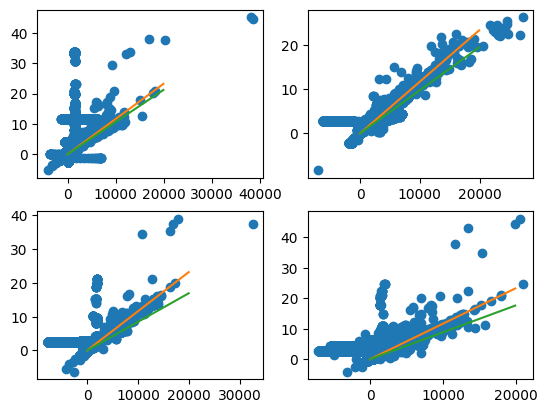

In [18]:
'''
plotting the data with lines representing the gradient based off of specific heat capcity in orange and the learned values in green
we see that the orange lines hold a more true representation of the relationship between thermal load and cooling load
'''


fig, ax = plt.subplots(2,2)
ax[0][0].plot(X_2,y_2 , 'o')
ax[0][0].plot(test_x,test_y)
ax[0][0].plot(test_x,test_x*grad2)

ax[0][1].plot(X_3,y_3 , 'o')
ax[0][1].plot(test_x,test_y)
ax[0][1].plot(test_x,test_x*grad3)

ax[1][0].plot(X_4,y_4 , 'o')
ax[1][0].plot(test_x,test_y)
ax[1][0].plot(test_x,test_x*grad4)

ax[1][1].plot(X_5,y_5 , 'o')
ax[1][1].plot(test_x,test_y)
ax[1][1].plot(test_x,test_x*grad5)

X_2 = np.column_stack([X_2, y_2]) 
X_3 = np.column_stack([X_3, y_3]) 
X_4 = np.column_stack([X_4, y_4]) 
X_5 = np.column_stack([X_5, y_5]) 

Estimated covariance matrix:
MCD (Robust):
[[2.05579387e+05 2.07924084e+02]
 [2.07924084e+02 3.05039805e-01]]
MLE:
[[4.09882760e+06 3.85327974e+03]
 [3.85327974e+03 6.86257232e+00]]


/var/folders/t5/__569tsd0s9c8lms_ltt1k000000gn/T/ipykernel_2302/1656753118.py:36: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  ax.legend(


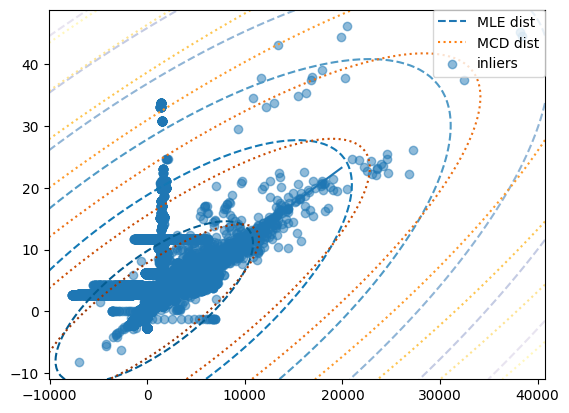

In [380]:
'''
one of the issue with the plots generated in the previous segment is that we can see there are points which share common cooling loads
this implies faulty sensors or erroneous data where.
we need to be able to effectively separate them from the healthy data

in this section we will explore how effective using covariance generators can be
'''

# fit a MCD robust estimator to data
robust_cov = MinCovDet(support_fraction=0.8).fit(X)
# fit a MLE estimator to data
emp_cov = EmpiricalCovariance().fit(X)
print(
    "Estimated covariance matrix:\nMCD (Robust):\n{}\nMLE:\n{}".format(
        robust_cov.covariance_, emp_cov.covariance_
    )
)

fig, ax = plt.subplots()
data=ax.scatter(X[:, 0], X[:, 1], alpha=0.5, label="Data points")
line1=ax.plot(test_x,test_y)


# Create meshgrid of feature 1 and feature 2 values
xx, yy = np.meshgrid(
    np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
    np.linspace(plt.ylim()[0], plt.ylim()[1], 100),
)
zz = np.c_[xx.ravel(), yy.ravel()]
# Calculate the MLE based Mahalanobis distances of the meshgrid
mahal_emp_cov = emp_cov.mahalanobis(zz)
mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
emp_cov_contour = ax.contour(
    xx, yy, np.sqrt(mahal_emp_cov), cmap=plt.cm.PuBu_r, linestyles="dashed"
)
# Calculate the MCD based Mahalanobis distances
mahal_robust_cov = robust_cov.mahalanobis(zz)
mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)
robust_contour = ax.contour(
    xx, yy, np.sqrt(mahal_robust_cov), cmap=plt.cm.YlOrBr_r, linestyles="dotted"
)

# Add legend
ax.legend(
    [
        mlines.Line2D([], [], color="tab:blue", linestyle="dashed"),
        mlines.Line2D([], [], color="tab:orange", linestyle="dotted"),
        data,
        line1,
        line2
    ],
    ["MLE dist", "MCD dist", "inliers", "outliers"],
    loc="upper right",
    borderaxespad=0,
)


plt.show()

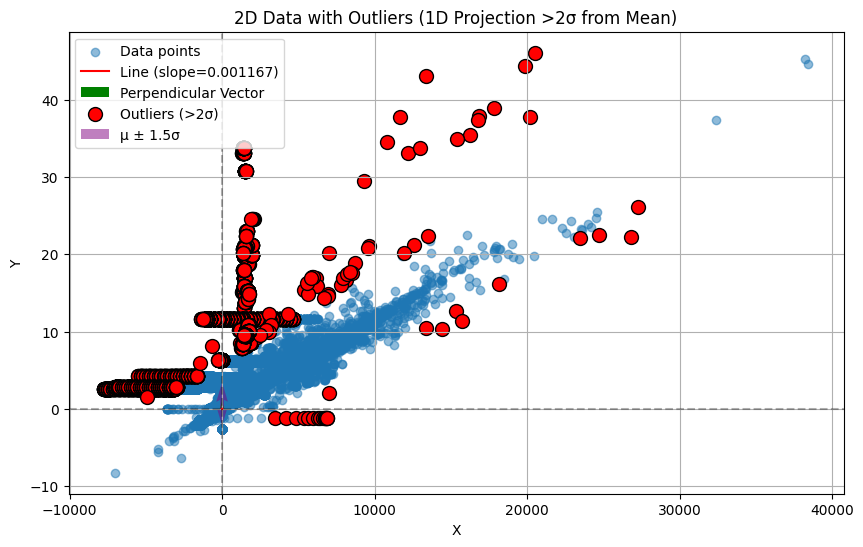

In [20]:
'''
sadly the covariance doesnt feel like it will be quite appropriate as the erroneous values have shifted the values of the matrix

to solve this we will try to project the data onto a vector perpendicular to the one that most accurately represents the 
relationship between cooling load and thermal load, assuming that the probability distribution of the projection follows a normal distribution
we can try separating data by 1.5 standard deviations from the mean
'''
# --- Given parameters ---
m = 0.0011666676000000001  # Slope of the original line
v_perp = np.array([-m, 1])  # Perpendicular vector (already computed)
v_perp = v_perp / np.linalg.norm(v_perp)  # Normalize

X = np.concatenate([X_2, X_3, X_4, X_5], axis=0)

projection = X @ v_perp

# --- Compute mean (μ) and std (σ) of projections ---
mu = np.mean(projection)
sigma = np.std(projection)

# --- Find outliers: |projection - μ| > 1.5σ ---
outlier_mask = np.abs(projection - mu) > 3 * sigma
outliers = X[outlier_mask]  # Outliers in original 2D space

# --- Plot original data + line + outliers ---
plt.figure(figsize=(10, 6))

# 1. Plot all data points
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label="Data points")

# 2. Plot the original line (y = m*x)
x_line = np.linspace(-3, 3, 100)
y_line = m * x_line
plt.plot(x_line, y_line, 'r-', label=f"Line (slope={m:.6f})")

# 3. Plot the perpendicular direction (projection axis)
plt.quiver(0, 0, v_perp[0], v_perp[1], angles='xy', scale_units='xy', scale=1, color='green', label="Perpendicular Vector")

# 4. Highlight outliers (points >1.5σ from mean in 1D projection)
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', s=100, edgecolor='black', label="Outliers (>2σ)")

# 5. Annotate μ ± 1.5σ in the projection direction
plt.quiver(0, 0, v_perp[0]*(mu + 1.5*sigma), v_perp[1]*(mu + 1.5*sigma), angles='xy', scale_units='xy', scale=1, color='purple', width=0.005, alpha=0.5, label="μ ± 1.5σ")
plt.quiver(0, 0, v_perp[0]*(mu - 1.5*sigma), v_perp[1]*(mu - 1.5*sigma), angles='xy', scale_units='xy', scale=1, color='purple', width=0.005, alpha=0.5)

plt.axhline(0, color='k', linestyle='--', alpha=0.3)
plt.axvline(0, color='k', linestyle='--', alpha=0.3)
plt.title("2D Data with Outliers (1D Projection >2σ from Mean)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
'''
while the previous methid has removed most of the erroneous data points i worry that it has also removed data points that have valuable information

for example the verticle line just above 0 most likely represents the system overcoming inertia as it starts up and goes from 0 upwards
these are important features to keep

the next filtering method we will be looking at how many times each of the unique cooling load measurements appear and the 
range of thermal loads that they represent

seeing as these are continuous measurements the likelihood of having duplicate measurements should be low (we verify this later, 
even after filtering out all of the cooling loads that only appear one time in the data set, the mean value is ~50, the mode is 2 and the median is 5)

we then filter out all measurements which appear more than 100 times, or that represent a spread of thermal loads > 7000kWh
'''
lens=[]
drop_vals=[]
for a in set(X[:,1]):
    mask = X[:, 1] == a
    x0_subset = X[:, 0][mask]
    diff = np.max(x0_subset) - np.min(x0_subset)
    lens.append(len(x0_subset))
    if (len(x0_subset)>100)|(diff>7000):
        drop_vals.append(a)
drop_vals = np.array(drop_vals)

In [308]:
# Convert to NumPy array
lens = np.array(lens)

# Filter out all 1s
lens = lens[lens != 1]

In [310]:
print(np.mean(lens))
print(st.mode(lens))
print(np.median(lens))
print(np.std(lens))

51.47782874617737
ModeResult(mode=array([2]), count=array([1021]))
5.0
1391.9413286315169


/var/folders/t5/__569tsd0s9c8lms_ltt1k000000gn/T/ipykernel_2302/3614225606.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(st.mode(lens))


In [109]:
mask = np.isin(temp['FCU-2 Cooling Load_kW'],drop_vals)|(temp['FCU-2 Cooling Load_kW'].isnull())|((temp['FCU-2 Cooling Load_kW']==0)&(temp['FCU-2 thermal load']!=0))

In [ ]:
temp['FCU-2 thermal load'].loc[mask]

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.500e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 9.100e+01, 0.000e+00, 5.100e+01,
        6.600e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.510e+02,
        1.000e+00, 0.000e+00, 1.068e+03, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 5.000e+0

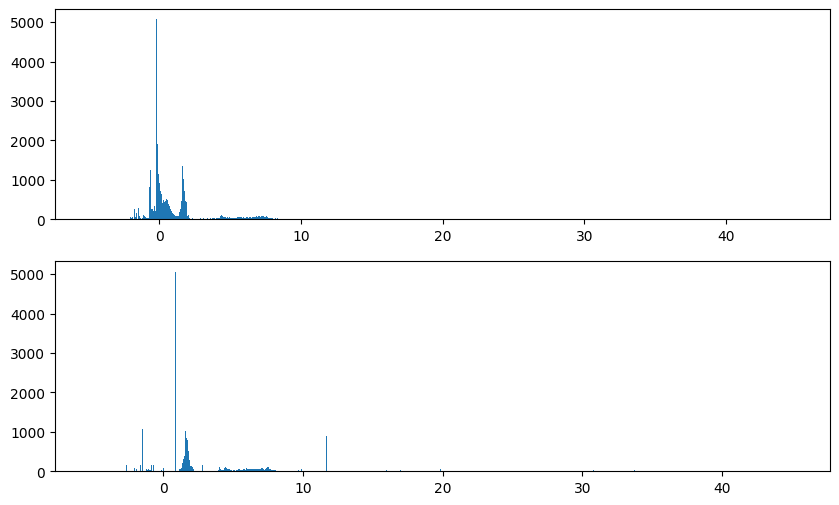

In [120]:
# --- Plot original data + line + outliers ---
fig , ax = plt.subplots(2,figsize=(10, 6), sharey=True)


temp['FCU-2 thermal load']
temp['FCU-2 Cooling Load_kW']
# 1. Plot all data points
ax[0].hist(temp['FCU-2 thermal load'].loc[temp['FCU-2 thermal load']!=0]*0.0011666676000000001,bins = 1000)
ax[1].hist(temp['FCU-2 Cooling Load_kW'].loc[temp['FCU-2 Cooling Load_kW']!=0], bins=1000)


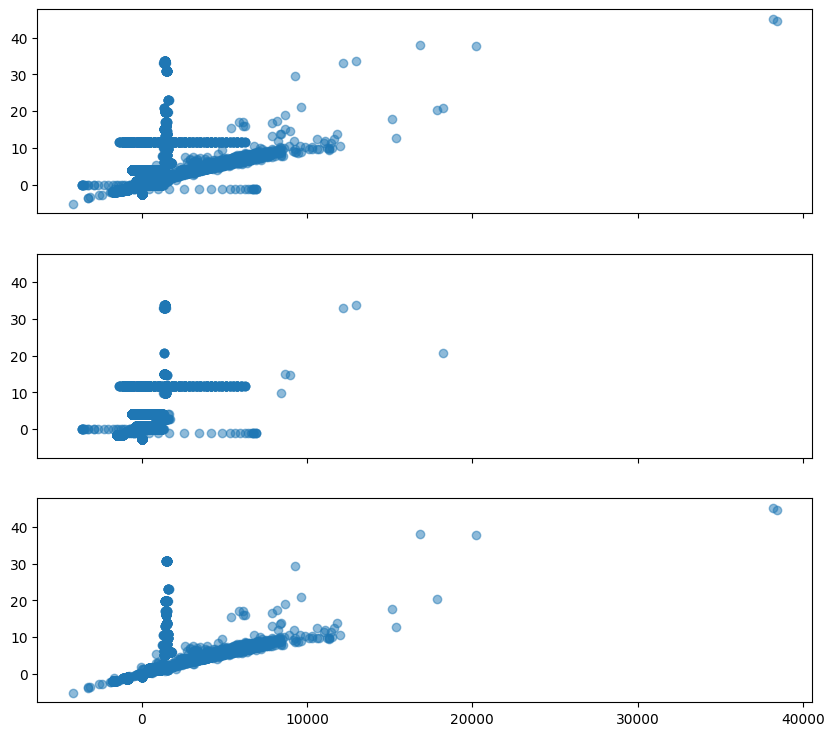

In [111]:
# --- Plot original data + line + outliers ---
fig , ax = plt.subplots(3,figsize=(10, 9),sharex=True, sharey=True)


temp['FCU-2 thermal load']
temp['FCU-2 Cooling Load_kW']
# 1. Plot all data points
ax[0].scatter(temp['FCU-2 thermal load'], temp['FCU-2 Cooling Load_kW'], alpha=0.5, label="Data points")
ax[1].scatter(temp['FCU-2 thermal load'][mask], temp['FCU-2 Cooling Load_kW'][mask], alpha=0.5, label="Data points")
ax[2].scatter(temp['FCU-2 thermal load'][~mask], temp['FCU-2 Cooling Load_kW'][~mask], alpha=0.5, label="Data points")

In [97]:
X_2[mask]

array([-2423.30312503,  4540.93744592,  4763.16508971, ...,
        1530.60609403,  1508.41641472,  1815.24758953])

In [104]:
mask = ~np.isin(X[:, 1], drop_vals)

#mask = np.asarray([not(a in drop_vals) for a in X[:,1]])
# Apply the mask to filter rows
X_filtered = X[mask]

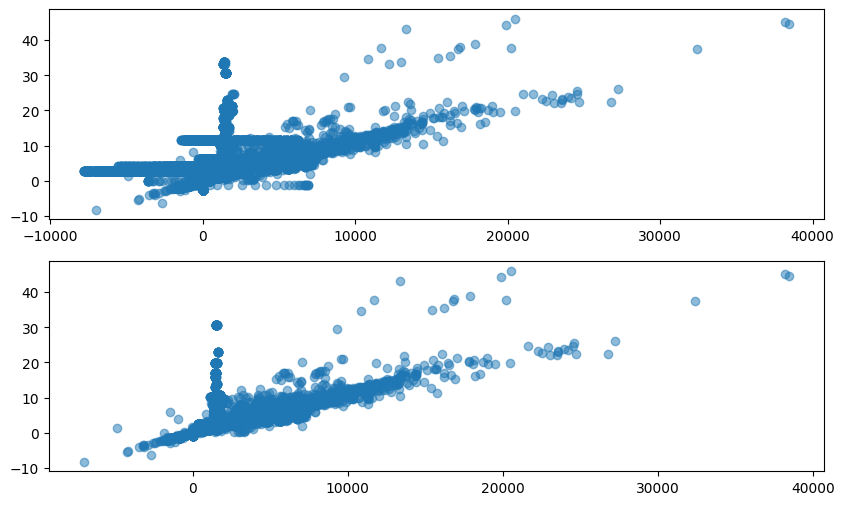

In [105]:
'''
the filtered plot on the bottom has removed all of the erroneous datapoints and so moving forward 
we will clean the original dataset with this same rule
'''

# --- Plot original data + line + outliers ---
fig , ax = plt.subplots(2,figsize=(10, 6))

# 1. Plot all data points
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.5, label="Data points")
ax[1].scatter(X_filtered[:, 0], X_filtered[:, 1], alpha=0.5, label="Data points")

In [ ]:
''' -----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------

working on original dataset now

-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------'''

In [27]:
comp_df['FCU-1 thermal load'] = (comp_df['FCU-01 CHW Return Temp']-comp_df['FCU-01 CHW Supply Temp'])*comp_df['FCU-01 CHW Flow Rate']
comp_df['FCU-2 thermal load'] = (comp_df['FCU-02 CHW Return Temp']-comp_df['FCU-02 CHW Supply Temp'])*comp_df['FCU-02 CHW Flow Rate_x']
comp_df['FCU-3 thermal load'] = (comp_df['FCU-03 CHW Return Temp']-comp_df['FCU-03 CHW Supply Temp'])*comp_df['FCU-03 CHW Flow Rate']
comp_df['FCU-4 thermal load'] = (comp_df['FCU-04 CHW Return Temp']-comp_df['FCU-04 CHW Supply Temp'])*comp_df['FCU-04 CHW Flow Rate']
comp_df['FCU-5 thermal load'] = (comp_df['FCU-05 CHW Return Temp']-comp_df['FCU-05 CHW Supply Temp'])*comp_df['FCU-05 CHW Flow Rate']

In [28]:
real_load = comp_df[['FCU-1 Cooling Load_kW','FCU-2 Cooling Load_kW','FCU-3 Cooling Load_kW','FCU-4 Cooling Load_kW','FCU-5 Cooling Load_kW']].values.reshape(-1)
calc_load = comp_df[['FCU-1 thermal load','FCU-2 thermal load','FCU-3 thermal load','FCU-4 thermal load','FCU-5 thermal load']].values.reshape(-1)

In [33]:
X__ = np.asarray([real_load,calc_load])
X__ = X__.T
X__.shape

(1424840, 2)

In [31]:
X.shape

(209231, 2)

In [ ]:
lens=[]
drop_vals=[]
for a in set(X[:,1]):
    mask = X[:, 1] == a
    x0_subset = X[:, 0][mask]
    diff = np.max(x0_subset) - np.min(x0_subset)
    lens.append(len(x0_subset))
    if (len(x0_subset)>100)|(diff>7000):
        drop_vals.append(a)
drop_vals = np.array(drop_vals)

In [114]:
'''when filling missing load data we will use the value 0.0011666676000000001

derived from the specific heat capacity of water as it has proven to most accurately represent the load on the building.'''

0.5466308917832197

In [ ]:
Ckg/s  

In [165]:
42000*0.0000000277778

0.0011666676000000001

In [35]:
reg.coef_

NameError: name 'reg' is not defined

In [36]:
test_df.columns.values

array(['Unnamed: 0', 'date', 'FCU-01 Watt', 'FCU-1 Cooling Load_kW',
       'FCU-01 KWh', 'FCU-01 CHW Supply Temp', 'FCU-01 CHW Return Temp',
       'FCU-01 Return Air CO2 Level', 'FCU-01 Return Air Humi',
       'FCU-01 Return Temp', 'FCU-01 Supply Air Flow Rate',
       'FCU-01 Supply Air Humi', 'FCU-01 Supply Air Temp',
       'FCU-01 CHW Flow Rate', 'FCU-02 CHW Flow Rate_x',
       'FCU-01 Temp Set Point', 'FCU-03 Watt', 'FCU-3 Cooling Load_kW',
       'FCU-03 Return Temp', 'FCU-03 Return Air Humi',
       'FCU-03 Return Air CO2 Level', 'FCU-03 Supply Air Flow Rate',
       'FCU-03 Supply Air Temp', 'FCU-03 Supply Air Humi',
       'FCU-03 CHW Return Temp', 'FCU-03 CHW Supply Temp',
       'FCU-03 CHW Flow Rate', 'FCU-03 Temp Set Point_x',
       'FCU-03 Temp Set Point_y', 'Outdoor Temperature',
       'Outdoor Temp Ave', 'Outdoor Humidity', 'Wind Speed',
       'Wind Direction', 'Solar Radiation', 'Zone 4 Fan-2 Control',
       'Zone 4 Fan-1 Control', 'Zone 4 Fan-3 Control',
     

In [ ]:
Outdoor Temperature             155309
Outdoor Temp Ave                246584
Outdoor Humidity                 45095
Wind Speed                       28927
Wind Direction                   30545
Solar Radiation                 150842
Zone 3 Temperature               18143
Zone 3  CO2                      18129
Zone 4 Temperature               18157
Zone 4 CO2                       18136
Zone 5 Temperature               18162
Zone 5 CO2 - S1                  18136
Zone 5 CO2 - S2                  18136
Zone 1 Temperature               18162
Zone 1  CO2 - S1                 18128
Zone 1  CO2 - S2                 18129
Zone 2 Temperature               18160
Zone 2 CO2                       18130
Zone 1 Ave CO2                   18132

In [37]:
import requests

url = "https://api-open.data.gov.sg/v2/real-time/api/air-temperature?date=2024-03-15T23:00:00"

response = requests.get(url)

In [411]:
1.344022, 103.858038

(1.344022, 103.858038)

In [38]:
import math

def get_value_by_station_id(data, station_id):
    for entry in data:
        if entry["station_id"] == station_id:
            return entry["value"]
    return None 

def haversine_distance(lat1, lon1, lat2, lon2):
    """Calculate the Haversine distance between two lat-long points in kilometers."""
    R = 6371.0  # Earth radius in km

    # Convert degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Differences
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance


def get_nearby_stations(target_lat, target_lon, stations, threshold=5):
    """
    Returns:
    - The ID and distance of all stations less than 5km from the target
    """
    stations_within_5km = []

    for station in stations:
        distance = haversine_distance(
            target_lat, target_lon,
            station['location']["latitude"], station['location']["longitude"]
        )
        if distance <= threshold:
            stations_within_5km.append([station["name"],station["id"],distance])

    return pd.DataFrame(stations_within_5km,columns=['name','id','distance'])  

In [39]:
get_nearby_stations(1.344022, 103.858038,response.json()['data']['stations'])

name    id  distance
0  Ang Mo Kio Avenue 5  S109  3.731913
1       Kim Chuan Road   S43  3.340074
2          Scotts Road  S111  4.425518

In [ ]:
'''
weather station logic

to fill gaps if there is a station sub 1.5km from BCA we will use that station as a representation of BCA

if there are no stations sub 1.5km we will use an average of all the stations sub 5km from BCA as a representation of the outside conditions.
'''

In [412]:
for station in response.json()['data']['stations']:
    print(station['name'],haversine_distance(station['location']['latitude'],station['location']['longitude'],1.344022, 103.858038))

Ang Mo Kio Avenue 5 3.731912975451289
Banyan Road 22.179408551473966
Clementi Road 9.103431127572462
East Coast Parkway 12.098311402531628
Kim Chuan Road 3.3400736862953644
Nanyang Avenue 19.60796647701676
Old Choa Chu Kang Road 15.411338998671091
Scotts Road 4.425518015759785
Tuas South Avenue 3 27.215929380572355
Upper Changi Road North 14.09695457781004
West Coast Highway 13.522874840450397
Woodlands Avenue 9 13.729616601835367


In [40]:
for a in response.json()['data']['readings']:
    print(a['timestamp'])

2024-03-15T23:00:00+08:00


In [41]:
for station in response.json()['data']['stations']:
    if station['name']=='Bishan':
        print(get_value_by_station_id(response.json()['data']['readings']['data'],station['id']))

In [42]:
test_df['Outdoor Temperature']

0         331.0
1         330.5
2         330.5
3         331.5
4         331.5
          ...  
284963      NaN
284964      NaN
284965      NaN
284966      NaN
284967      NaN
Name: Outdoor Temperature, Length: 284968, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


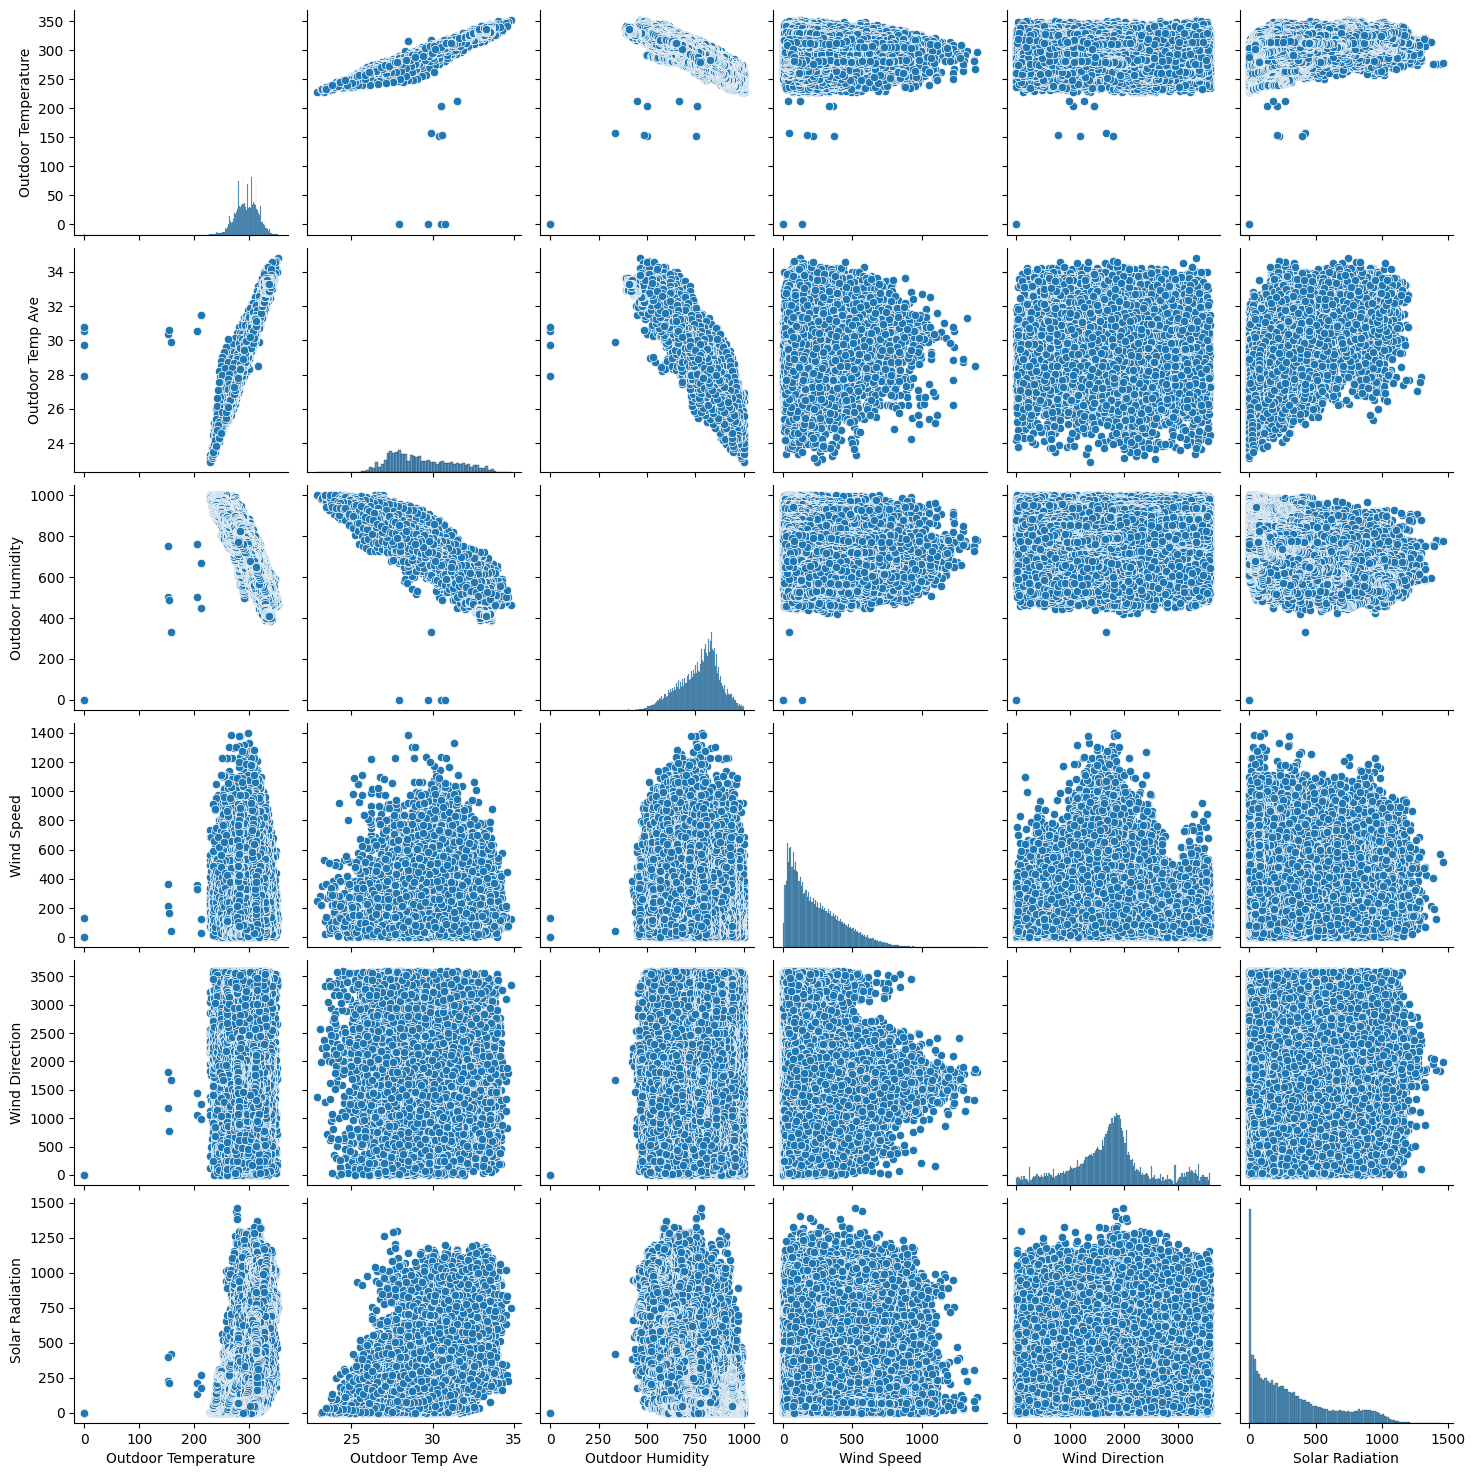

In [390]:
sns.pairplot(test_df[['Outdoor Temperature','Outdoor Temp Ave','Outdoor Humidity','Wind Speed','Wind Direction','Solar Radiation']])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


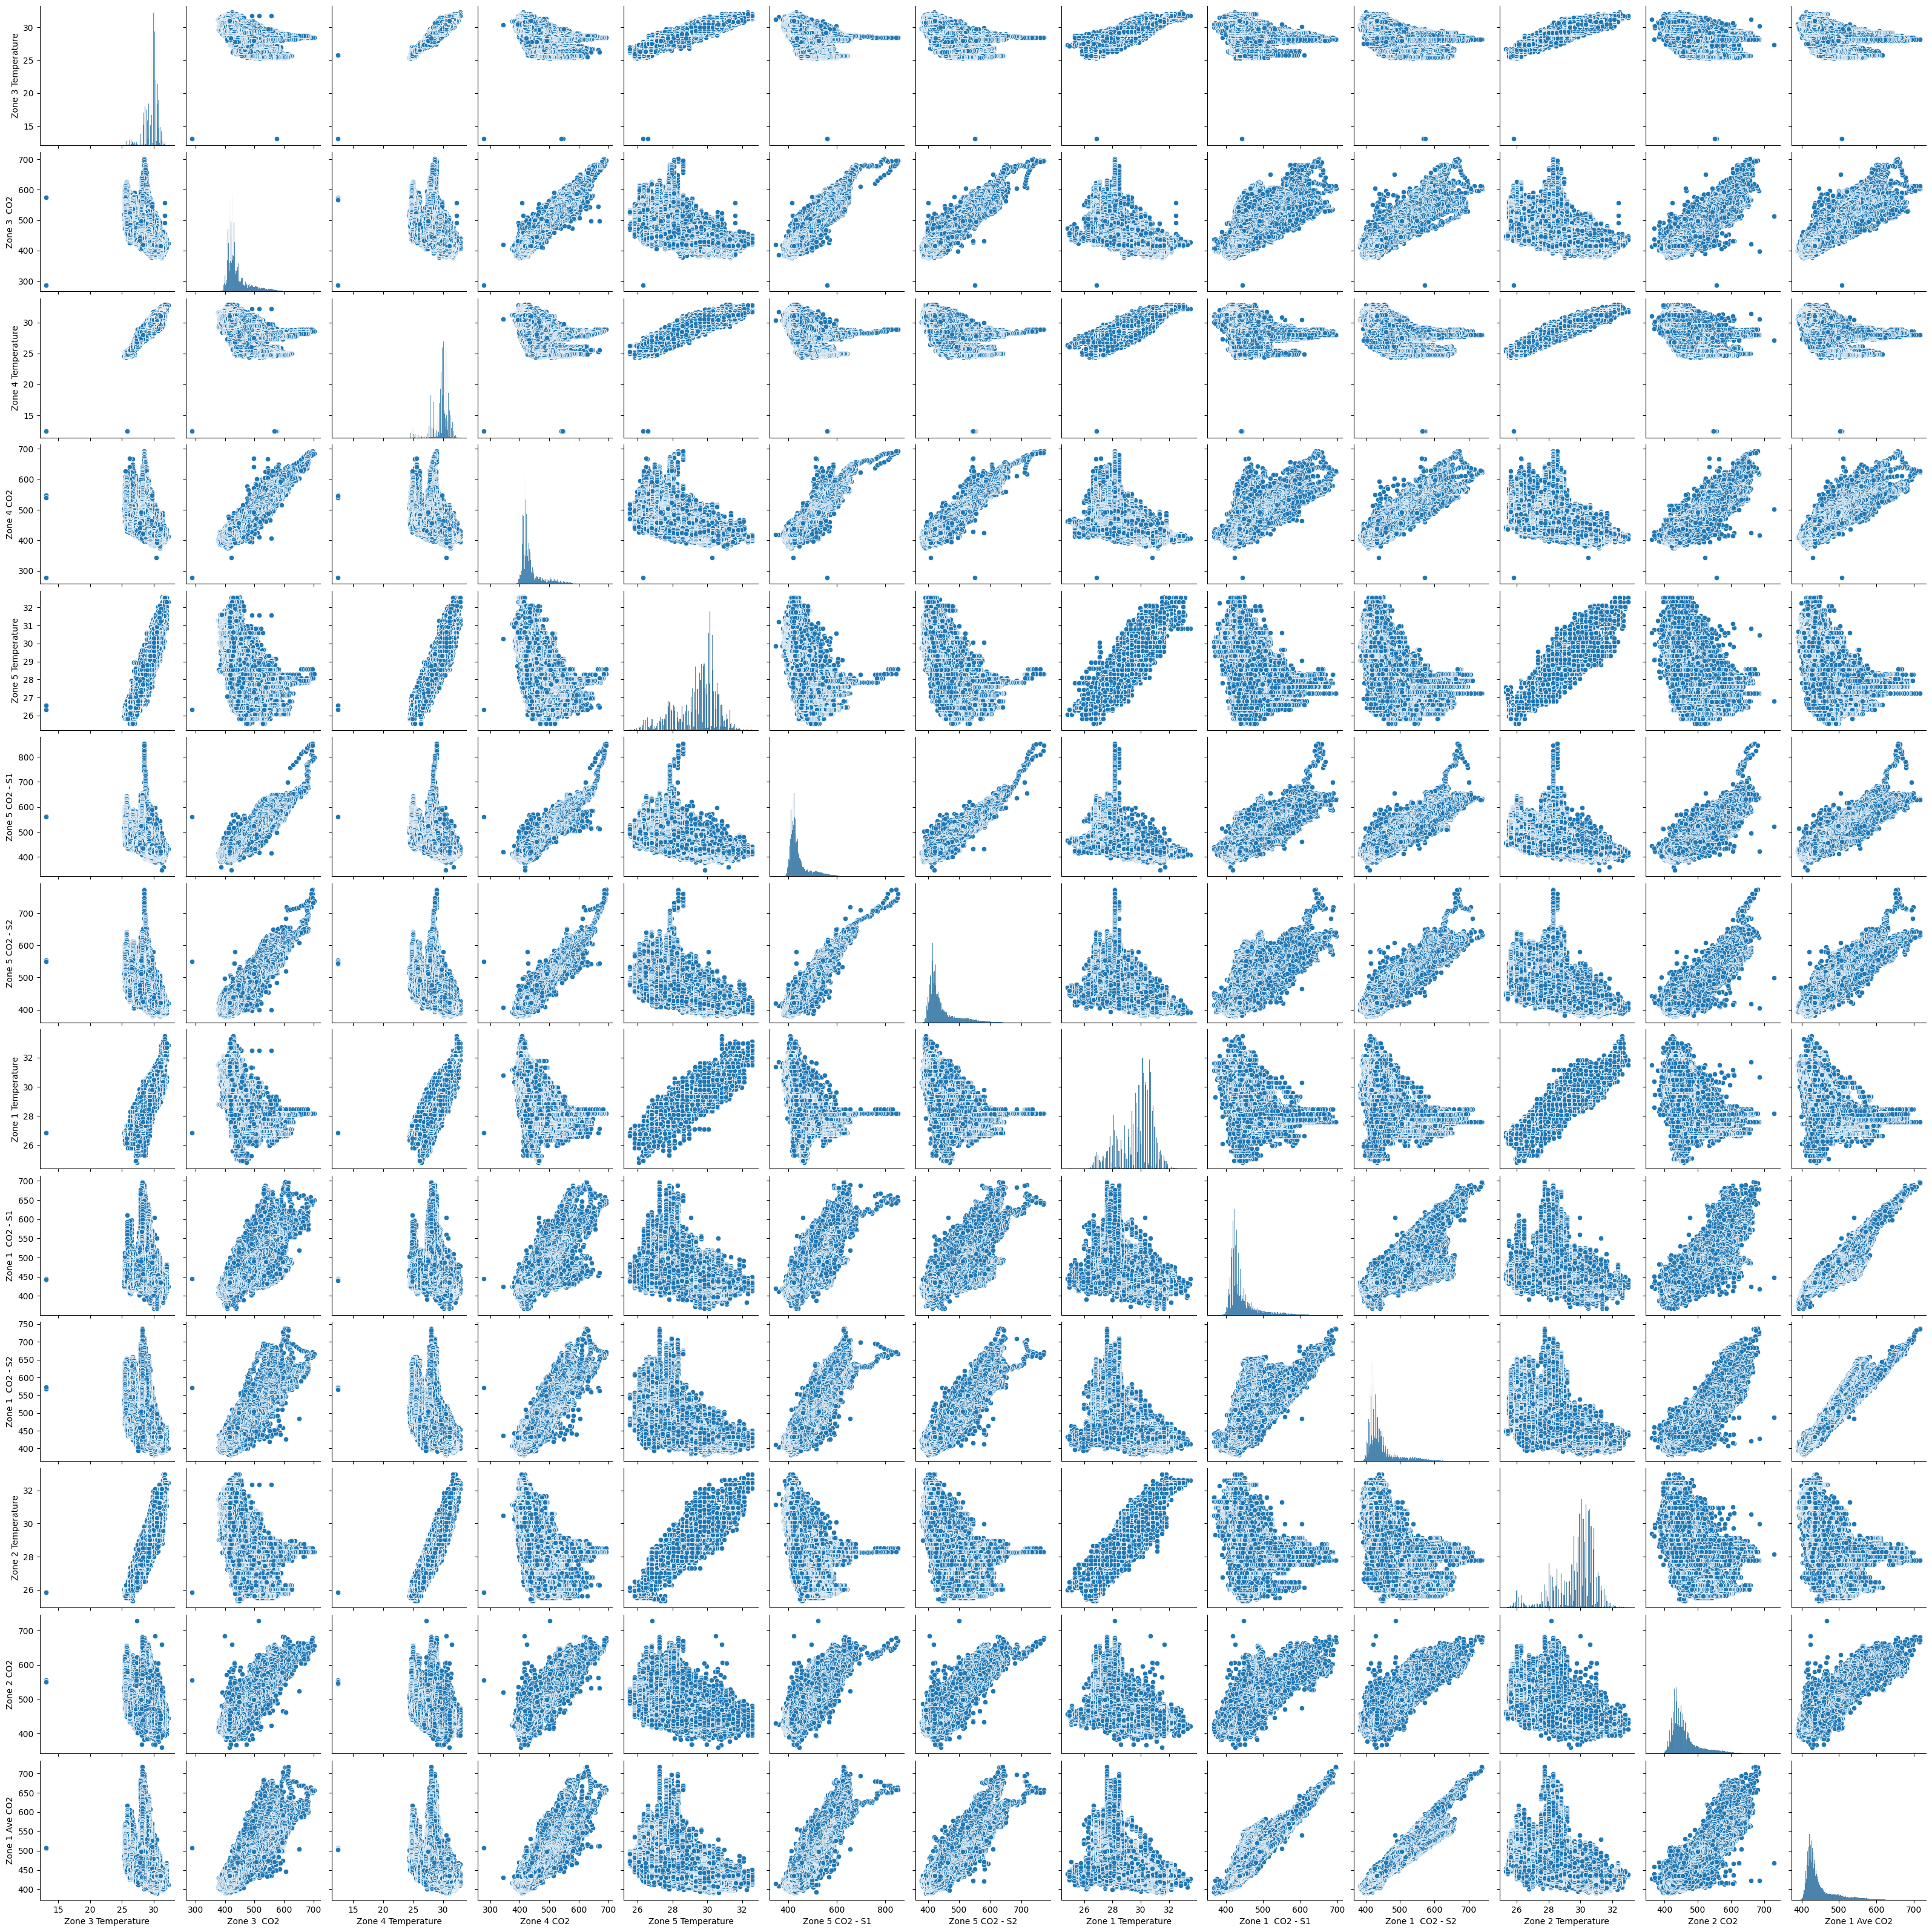

In [391]:
sns.pairplot(test_df[['Zone 3 Temperature'           
,'Zone 3  CO2'                  
,'Zone 4 Temperature'               
,'Zone 4 CO2'                       
,'Zone 5 Temperature'               
,'Zone 5 CO2 - S1'                 
,'Zone 5 CO2 - S2'                 
,'Zone 1 Temperature'              
,'Zone 1  CO2 - S1'                
,'Zone 1  CO2 - S2'               
,'Zone 2 Temperature'               
,'Zone 2 CO2'                       
,'Zone 1 Ave CO2']])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


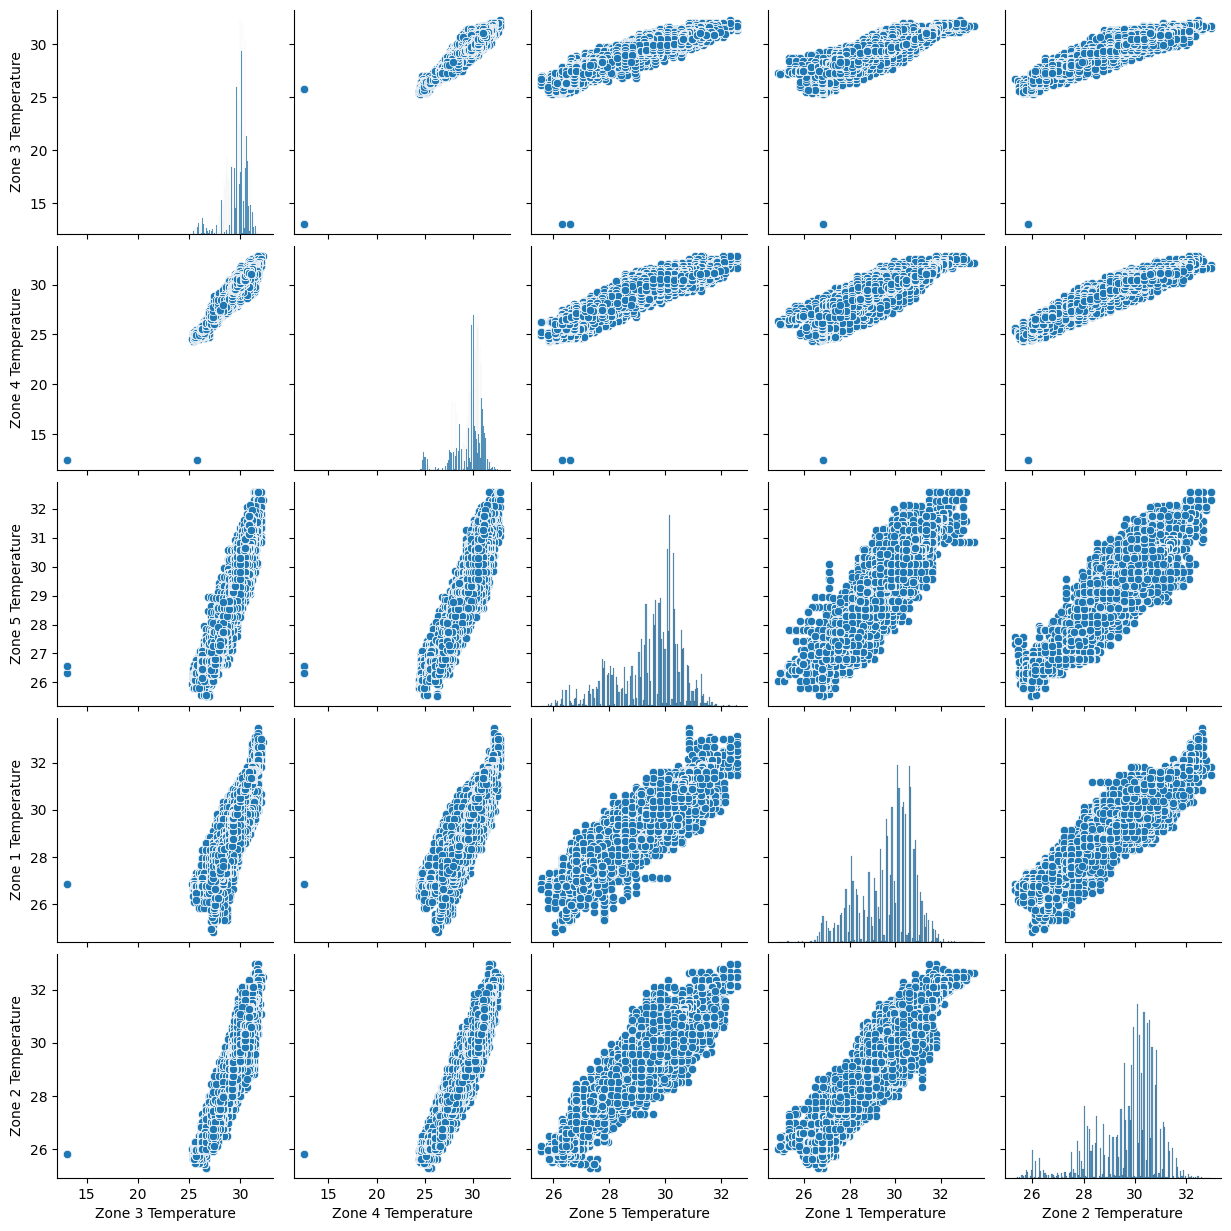

In [392]:
sns.pairplot(test_df[['Zone 3 Temperature'                           
,'Zone 4 Temperature'                                  
,'Zone 5 Temperature'                              
,'Zone 1 Temperature'                            
,'Zone 2 Temperature'   ]])

In [43]:
test = [sum(not np.isnan(x) for x in a) for a in test_df[['Zone 3 Temperature'                           
,'Zone 4 Temperature'                                  
,'Zone 5 Temperature'                              
,'Zone 1 Temperature'                            
,'Zone 2 Temperature']].values]

In [44]:
len(test)

284968

In [45]:
sum(x==0 for x in test)

18122

In [46]:
sum(x==1 for x in test)

24

In [47]:
sum(x==2 for x in test)

14

In [48]:
sum(x==3 for x in test)

16

In [49]:
sum(x==4 for x in test)

4

In [50]:
sum(x==5 for x in test)

266788

In [459]:
comp_df

Unnamed: 0            Timestamp  FCU-1 Cooling Load_kW  \
0                0  2024-02-02 05:00:00                    NaN   
1                1  2024-02-02 05:03:00                    NaN   
2                2  2024-02-02 05:04:00                    NaN   
3                3  2024-02-02 05:05:00                    NaN   
4                4  2024-02-02 05:06:00                    NaN   
...            ...                  ...                    ...   
284963      284963  2024-09-29 05:01:00                    NaN   
284964      284964  2024-09-29 05:02:00                    NaN   
284965      284965  2024-09-29 05:03:00                    NaN   
284966      284966  2024-09-29 05:04:00                    NaN   
284967      284967  2024-09-29 05:05:00                    NaN   

        FCU-2 Cooling Load_kW  FCU-3 Cooling Load_kW  FCU-4 Cooling Load_kW  \
0                         NaN                    NaN                    NaN   
1                         NaN                    NaN                    NaN   
2                         NaN                    NaN                    NaN   
3                         NaN                    NaN                    NaN   
4                         NaN                    NaN                    NaN   
...                       ...                    ...                    ...   
284963                    NaN                    NaN                    NaN   
284964                    NaN                    NaN                    NaN   
284965                    NaN                    NaN                    NaN   
284966                    NaN                    NaN                    NaN   
284967                    NaN                    NaN                    NaN   

        FCU-5 Cooling Load_kW  PFCU-1 Cooling Load_kW  PFCU-2 Cooling Load_kW  \
0                         NaN                     NaN                     NaN   
1                         NaN                     NaN                     NaN   
2                         NaN                     NaN                     NaN   
3                         NaN                     NaN                     NaN   
4                         NaN                     NaN                     NaN   
...                       ...                     ...                     ...   
284963                    NaN                     NaN                     NaN   
284964                    NaN                     NaN                     NaN   
284965                    NaN                     NaN                     NaN   
284966                    NaN                     NaN                     NaN   
284967                    NaN                     NaN                     NaN   

        Outdoor Temperature  ...  Zone 1  CO2 - S2  Zone 2 Temperature  \
0                       NaN  ...               NaN                 NaN   
1                       NaN  ...               NaN                 NaN   
2                       NaN  ...               NaN                 NaN   
3                       NaN  ...               NaN                 NaN   
4                       NaN  ...               NaN                 NaN   
...                     ...  ...               ...                 ...   
284963                  NaN  ...               NaN                 NaN   
284964                  NaN  ...               NaN                 NaN   
284965                  NaN  ...               NaN                 NaN   
284966                  NaN  ...               NaN                 NaN   
284967                  NaN  ...               NaN                 NaN   

        Zone 2 CO2  Zone 1 Ave CO2  Z7 Windows Open Close Status  \
0              NaN             NaN                           NaN   
1              NaN             NaN                           NaN   
2              NaN             NaN                           NaN   
3              NaN             NaN                           NaN   
4              NaN             NaN                           NaN

In [51]:
# Set 'Timestamp' as the index

comp_df["Timestamp"] = pd.to_datetime(comp_df["Timestamp"]).dt.floor("T")

comp_df.set_index("Timestamp", inplace=True)

# Generate a complete range of timestamps at 1-minute intervals
full_range = pd.date_range(start=comp_df.index.min(), end=comp_df.index.max(), freq='1T')

# Reindex the DataFrame to this full range, filling missing times with NaN
df_full = comp_df.reindex(full_range)

# Optional: Rename the index back to 'Timestamp' and reset index
df_full.index.name = "Timestamp"
df_full.reset_index(inplace=True,drop=False)

In [54]:
print(df_full.isnull().sum())

Timestamp                  0
Unnamed: 0.1           60638
Unnamed: 0             60638
date                   60638
FCU-01 Watt            80020
                       ...  
FCU-1 thermal load    279511
FCU-2 thermal load    279373
FCU-3 thermal load    279374
FCU-4 thermal load    279368
FCU-5 thermal load    279367
Length: 178, dtype: int64


In [55]:
#df_full.reset_index(inplace=True,drop=False)
df_full

Timestamp  Unnamed: 0.1  Unnamed: 0                 date  \
0      2024-02-02 05:00:00      278359.0    278359.0  2024-02-02 05:00:00   
1      2024-02-02 05:01:00           NaN         NaN                  NaN   
2      2024-02-02 05:02:00           NaN         NaN                  NaN   
3      2024-02-02 05:03:00      284963.0    284963.0  2024-02-02 05:03:00   
4      2024-02-02 05:04:00      284964.0    284964.0  2024-02-02 05:04:00   
...                    ...           ...         ...                  ...   
345601 2024-09-29 05:01:00      278354.0    278354.0  2024-09-29 05:01:00   
345602 2024-09-29 05:02:00      278355.0    278355.0  2024-09-29 05:02:00   
345603 2024-09-29 05:03:00      278356.0    278356.0  2024-09-29 05:03:00   
345604 2024-09-29 05:04:00      278357.0    278357.0  2024-09-29 05:04:00   
345605 2024-09-29 05:05:00      278358.0    278358.0  2024-09-29 05:05:00   

        FCU-01 Watt  FCU-1 Cooling Load_kW  FCU-01 KWh  \
0               NaN                    NaN         NaN   
1               NaN                    NaN         NaN   
2               NaN                    NaN         NaN   
3               NaN                    NaN         NaN   
4               NaN                    NaN         NaN   
...             ...                    ...         ...   
345601          NaN                    NaN         NaN   
345602          NaN                    NaN         NaN   
345603          NaN                    NaN         NaN   
345604          NaN                    NaN         NaN   
345605          NaN                    NaN         NaN   

        FCU-01 CHW Supply Temp  FCU-01 CHW Return Temp  \
0                          NaN                     NaN   
1                          NaN                     NaN   
2                          NaN                     NaN   
3                          NaN                     NaN   
4                          NaN                     NaN   
...                        ...                     ...   
345601                     NaN                     NaN   
345602                     NaN                     NaN   
345603                     NaN                     NaN   
345604                     NaN                     NaN   
345605                     NaN                     NaN   

        FCU-01 Return Air CO2 Level  ...  FCU-04 Return Air Humi  \
0                               NaN  ...                     NaN   
1                               NaN  ...                     NaN   
2                               NaN  ...                     NaN   
3                               NaN  ...                     NaN   
4                               NaN  ...                     NaN   
...                             ...  ...                     ...   
345601                          NaN  ...                     NaN   
345602                          NaN  ...                     NaN   
345603                          NaN  ...                     NaN   
345604                          NaN  ...                     NaN   
345605                          NaN  ...                     NaN   

        FCU-04 RM Temp  FCU-04 Supply Air Flow Rate  FCU-04 Supply Air Humi  \
0                  NaN                          NaN                     NaN   
1                  NaN                          NaN                     NaN   
2                  NaN                          NaN                     NaN   
3                  NaN                          NaN                     NaN   
4                  NaN                          NaN                     NaN   
...                ...                          ...                     ...   
345601             NaN                          NaN                     NaN   
345602             NaN                          NaN                     NaN   
345603             NaN                          NaN                     NaN   
345604             NaN                          NaN                     NaN   
345605      

In [62]:
def fill_islands(df, col, max_gap=30, tolerance=0.10):
    data = df[col].copy()
    is_nan = data.isna()
    
    filled = data.copy()
    i = 0
    
    while i < len(data):
        if is_nan.iloc[i]:
            start = i
            while i < len(data) and is_nan.iloc[i]:
                i += 1
            end = i  # non-NaN starts again here
            
            gap_size = end - start
            #print(gap_size)
            
            if start > 0 and end < len(data) and gap_size < max_gap:
                val_before = data.iloc[start - 1]
                val_after = data.iloc[end]

                # Handle edge cases where before/after might still be NaN
                if pd.notna(val_before) and pd.notna(val_after):
                    if 'Open Close Status' in col:
                        if val_after == val_before:
                            filled.iloc[start:end] = val_before
                    elif val_before !=0:
                        if abs(val_after - val_before) / abs(val_before) <= tolerance:
                            filled.iloc[start:end] = val_before  # or use linear interpolation
                    else:
                        if abs(val_after - val_before)<2:
                            filled.iloc[start:end] = val_before  # or use linear interpolation
        else:
            i += 1
    return filled


In [59]:

# Apply to each relevant column
columns_to_fill = [col for col in df_full.columns if col not in ["Timestamp", "Unnamed: 0",'Unnamed: 0.1','date']]
columns_to_fill


['FCU-01 Watt',
 'FCU-1 Cooling Load_kW',
 'FCU-01 KWh',
 'FCU-01 CHW Supply Temp',
 'FCU-01 CHW Return Temp',
 'FCU-01 Return Air CO2 Level',
 'FCU-01 Return Air Humi',
 'FCU-01 Return Temp',
 'FCU-01 Supply Air Flow Rate',
 'FCU-01 Supply Air Humi',
 'FCU-01 Supply Air Temp',
 'FCU-01 CHW Flow Rate',
 'FCU-02 CHW Flow Rate_x',
 'FCU-01 Temp Set Point',
 'FCU-03 Watt',
 'FCU-3 Cooling Load_kW',
 'FCU-03 Return Temp',
 'FCU-03 Return Air Humi',
 'FCU-03 Return Air CO2 Level',
 'FCU-03 Supply Air Flow Rate',
 'FCU-03 Supply Air Temp',
 'FCU-03 Supply Air Humi',
 'FCU-03 CHW Return Temp',
 'FCU-03 CHW Supply Temp',
 'FCU-03 CHW Flow Rate',
 'FCU-03 Temp Set Point_x',
 'FCU-03 Temp Set Point_y',
 'Outdoor Temperature',
 'Outdoor Temp Ave',
 'Outdoor Humidity',
 'Wind Speed',
 'Wind Direction',
 'Solar Radiation',
 'Zone 4 Fan-2 Control',
 'Zone 4 Fan-1 Control',
 'Zone 4 Fan-3 Control',
 'Zone 4 Fan-4 Control',
 'Zone 4 Fan-5 Control',
 'Zone 4 Fan-6 Control',
 'Zone 5 Fan-1 Control',
 'Z

In [60]:
columns_to_fill[66]

'Zone 4 Temperature'

In [63]:
print(df_full[columns_to_fill[66]].isnull().sum())
testing = fill_islands(df_full,columns_to_fill[66])
np.sum([np.isnan(x) for x in testing])

78795


78740

In [73]:
a = pd.DataFrame(df_full['Timestamp'])
a['groud_truth'] = df_full[columns_to_fill[66]]#.isnull()
a['filled'] = testing#.isnull()
a

Timestamp  groud_truth  filled
0      2024-02-02 05:00:00          NaN     NaN
1      2024-02-02 05:01:00          NaN     NaN
2      2024-02-02 05:02:00          NaN     NaN
3      2024-02-02 05:03:00          NaN     NaN
4      2024-02-02 05:04:00          NaN     NaN
...                    ...          ...     ...
345601 2024-09-29 05:01:00          NaN     NaN
345602 2024-09-29 05:02:00          NaN     NaN
345603 2024-09-29 05:03:00          NaN     NaN
345604 2024-09-29 05:04:00          NaN     NaN
345605 2024-09-29 05:05:00          NaN     NaN

[345606 rows x 3 columns]

In [68]:
a['year'] = a.Timestamp.dt.year
a['month'] = a.Timestamp.dt.month
a['day'] = a.Timestamp.dt.day
a

Timestamp  groud_truth  filled  year  month  day
0      2024-02-02 05:00:00         True    True  2024      2    2
1      2024-02-02 05:01:00         True    True  2024      2    2
2      2024-02-02 05:02:00         True    True  2024      2    2
3      2024-02-02 05:03:00         True    True  2024      2    2
4      2024-02-02 05:04:00         True    True  2024      2    2
...                    ...          ...     ...   ...    ...  ...
345601 2024-09-29 05:01:00         True    True  2024      9   29
345602 2024-09-29 05:02:00         True    True  2024      9   29
345603 2024-09-29 05:03:00         True    True  2024      9   29
345604 2024-09-29 05:04:00         True    True  2024      9   29
345605 2024-09-29 05:05:00         True    True  2024      9   29

[345606 rows x 6 columns]

In [69]:
a_sum = a[['groud_truth','filled','year','month','day']].groupby(['year','month','day']).sum()
a_sum

groud_truth  filled
year month day                     
2024 2     2           1140    1140
           3           1440    1440
           4           1440    1440
           5           1440    1440
           6           1440    1440
...                     ...     ...
     9     25             0       0
           26             0       0
           27             0       0
           28             0       0
           29            29      29

[241 rows x 2 columns]

In [70]:
print((a_sum['filled']==0).sum(),(a_sum['groud_truth']==0).sum())

180 173


In [71]:
print((a_sum['filled']>0).sum(),(a_sum['groud_truth']>0).sum())

61 68


In [539]:
df_full

Timestamp  Unnamed: 0  FCU-1 Cooling Load_kW  \
0      2024-02-02 05:00:00         0.0                    NaN   
1      2024-02-02 05:01:00         NaN                    NaN   
2      2024-02-02 05:02:00         NaN                    NaN   
3      2024-02-02 05:03:00         1.0                    NaN   
4      2024-02-02 05:04:00         2.0                    NaN   
...                    ...         ...                    ...   
345601 2024-09-29 05:01:00    284963.0                    NaN   
345602 2024-09-29 05:02:00    284964.0                    NaN   
345603 2024-09-29 05:03:00    284965.0                    NaN   
345604 2024-09-29 05:04:00    284966.0                    NaN   
345605 2024-09-29 05:05:00    284967.0                    NaN   

        FCU-2 Cooling Load_kW  FCU-3 Cooling Load_kW  FCU-4 Cooling Load_kW  \
0                         NaN                    NaN                    NaN   
1                         NaN                    NaN                    NaN   
2                         NaN                    NaN                    NaN   
3                         NaN                    NaN                    NaN   
4                         NaN                    NaN                    NaN   
...                       ...                    ...                    ...   
345601                    NaN                    NaN                    NaN   
345602                    NaN                    NaN                    NaN   
345603                    NaN                    NaN                    NaN   
345604                    NaN                    NaN                    NaN   
345605                    NaN                    NaN                    NaN   

        FCU-5 Cooling Load_kW  PFCU-1 Cooling Load_kW  PFCU-2 Cooling Load_kW  \
0                         NaN                     NaN                     NaN   
1                         NaN                     NaN                     NaN   
2                         NaN                     NaN                     NaN   
3                         NaN                     NaN                     NaN   
4                         NaN                     NaN                     NaN   
...                       ...                     ...                     ...   
345601                    NaN                     NaN                     NaN   
345602                    NaN                     NaN                     NaN   
345603                    NaN                     NaN                     NaN   
345604                    NaN                     NaN                     NaN   
345605                    NaN                     NaN                     NaN   

        Outdoor Temperature  ...  Zone 1  CO2 - S2  Zone 2 Temperature  \
0                       NaN  ...               NaN                 NaN   
1                       NaN  ...               NaN                 NaN   
2                       NaN  ...               NaN                 NaN   
3                       NaN  ...               NaN                 NaN   
4                       NaN  ...               NaN                 NaN   
...                     ...  ...               ...                 ...   
345601                  NaN  ...               NaN                 NaN   
345602                  NaN  ...               NaN                 NaN   
345603                  NaN  ...               NaN                 NaN   
345604                  NaN  ...               NaN                 NaN   
345605                  NaN  ...               NaN                 NaN   

        Zone 2 CO2  Zone 1 Ave CO2  Z7 Windows Open Close Status  \
0              NaN             NaN                           NaN   
1              NaN             NaN                           NaN   
2              NaN             NaN                           NaN   
3              NaN             NaN                           NaN   
4              NaN             NaN                           NaN   
...            ..

In [596]:
new_df=pd.DataFrame()
new_df['Timestamp'] = df_full['Timestamp']
for col in columns_to_fill:
    new_df[col] = fill_islands(df_full, col)

In [1]:
df_full.isnull()

NameError: name 'df_full' is not defined

In [594]:
df_full.isnull().sum()-new_df.isnull().sum()

FCU-1 Cooling Load_kW              120.0
FCU-2 Cooling Load_kW               35.0
FCU-3 Cooling Load_kW               33.0
FCU-4 Cooling Load_kW               41.0
FCU-5 Cooling Load_kW               37.0
Outdoor Humidity                 24868.0
Outdoor Temp Ave                 78097.0
Outdoor Temperature             120629.0
PFCU-1 Cooling Load_kW              36.0
PFCU-2 Cooling Load_kW              20.0
Solar Radiation                   4838.0
Timestamp                            0.0
Unnamed: 0                           NaN
Wind Direction                     167.0
Wind Speed                         129.0
Z1 Windows Open Close Status       709.0
Z2 Windows Open Close Status       713.0
Z3 Windows Open Close Status       884.0
Z5 Windows Open Close Status       706.0
Z6 Windows Open Close Status       693.0
Z7 Windows Open Close Status       663.0
Zone 1  CO2 - S1                    46.0
Zone 1  CO2 - S2                    46.0
Zone 1 Ave CO2                      48.0
Zone 1 Temperatu

In [74]:
def find_nan_islands(df, column):
    is_nan = df[column].isna()
    islands = []
    start = None
    
    for i in range(len(is_nan)):
        if is_nan[i] and start is None:
            start = df.loc[i, "Timestamp"]
        elif not is_nan[i] and start is not None:
            end = df.loc[i - 1, "Timestamp"]
            duration = (end - start).total_seconds() / 60  # duration in minutes
            islands.append((start, end, duration))
            start = None
    
    # Handle case where NaNs go to the end
    if start is not None:
        end = df.loc[len(df) - 1, "Timestamp"]
        duration = (end - start).total_seconds() / 60
        islands.append((start, end, duration))
    
    return pd.DataFrame(islands, columns=["Start", "End", "Duration (minutes)"])

def find_nan_islands_with_diff(df, column):
    is_nan = df[column].isna()
    islands = []
    start = None
    
    for i in range(len(is_nan)):
        if is_nan[i] and start is None:
            start = df.loc[i, "Timestamp"]
            start_index = i
        elif not is_nan[i] and start is not None:
            end = df.loc[i - 1, "Timestamp"]
            end_index = i
            
            # Calculate difference
            value_before = df.loc[start_index - 1, column] if start_index > 0 else None
            value_after = df.loc[end_index, column] if end_index < len(df) else None
            
            if pd.notna(value_before) and pd.notna(value_after):
                value_diff = value_after - value_before
            else:
                value_diff = None
            
            duration = (end - start).total_seconds() / 60  # duration in minutes
            islands.append((start, end, duration, value_diff))
            start = None
    
    # Handle case where NaNs go to the end
    if start is not None:
        end = df.loc[len(df) - 1, "Timestamp"]
        end_index = len(df)
        
        value_before = df.loc[start_index - 1, column] if start_index > 0 else None
        value_after = None
        
        if pd.notna(value_before):
            value_diff = None  # No end value to compare
        else:
            value_diff = None
            
        duration = (end - start).total_seconds() / 60
        islands.append((start, end, duration, value_diff))
    
    return pd.DataFrame(islands, columns=["Start", "End", "Duration (minutes)", "Value Difference"])


In [75]:
# Example usage for one of your columns
islands_df = find_nan_islands_with_diff(a, "filled")
print(islands_df)

                Start                 End  Duration (minutes)  \
0 2024-02-02 05:00:00 2024-03-13 08:54:00             57834.0   
1 2024-03-28 01:09:00 2024-04-01 04:05:00              5936.0   
2 2024-04-06 00:10:00 2024-04-08 00:17:00              2887.0   
3 2024-06-14 06:46:00 2024-06-14 10:20:00               214.0   
4 2024-06-22 00:55:00 2024-06-24 06:00:00              3185.0   
5 2024-08-13 07:58:00 2024-08-19 08:07:00              8649.0   
6 2024-09-29 04:37:00 2024-09-29 05:05:00                28.0   

   Value Difference  
0               NaN  
1         -5.665626  
2         -1.187502  
3          1.937500  
4         -1.393749  
5          1.687500  
6               NaN  


In [78]:
a.filled.count() - a.filled.isnull().sum()

188126

<Axes: >

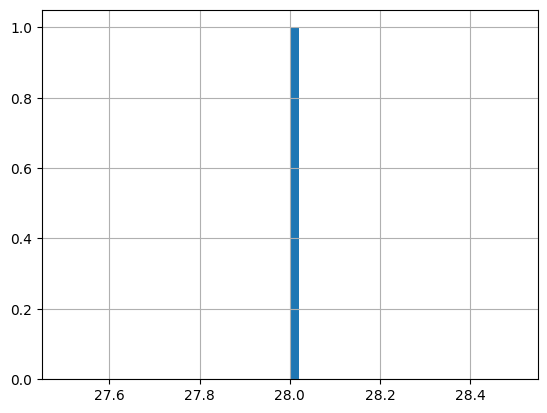

In [87]:
islands_df.loc[islands_df['Duration (minutes)']<(60*3)]['Duration (minutes)'].hist(bins=50)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


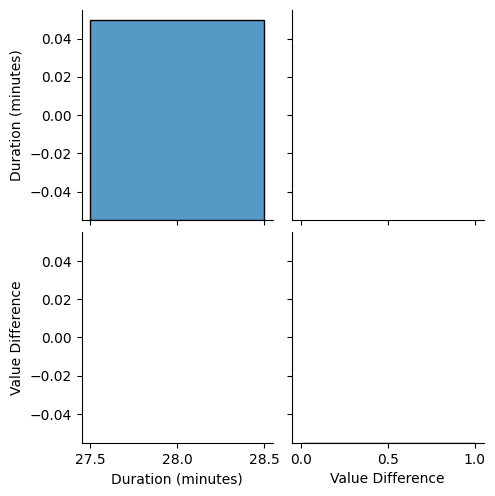

In [89]:
sns.pairplot(islands_df.loc[(islands_df['Duration (minutes)']<(150))][['Duration (minutes)','Value Difference']])